<div>
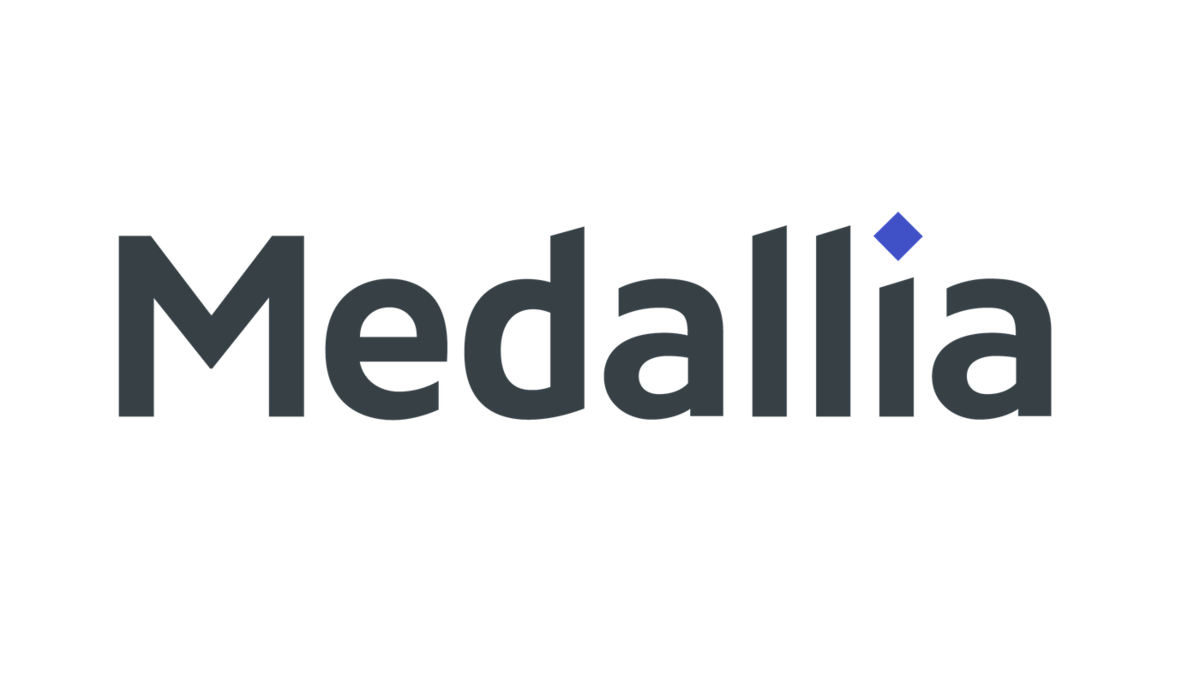
</div>

# IBM Reviews on Reddit: Sentiment Analysis + Name Entity Recognition
This purpose of this notebook is to analyze specfic comment sentiment (i.e. positive or negative connotation) about companies. The comment_sentiment_analysis() function takes in three parameters:
1. subreddit: a string of the Reddit thread you would like to analyze 
2. comment_limit: the number of most recent comments you would like to fetch 
3. top_limit: the number of top positive and negative comments you want to display 


In [1]:
# Import praw packages to pull reddit data
import pandas
from os.path import isfile
import praw
import pandas as pd
from time import sleep
from collections import defaultdict
from IPython.core.display import display, HTML
import warnings
import numpy as np
warnings.filterwarnings("ignore")

# Importing packages for sentiment analysis and visuals
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Get credentials from DEFAULT instance in praw.ini
reddit = praw.Reddit('DEFAULT') # creating a reddit instance

# Gather Threads from the r/ibm from Reddit API

I filtered the thread titles down so that they only contain the buzzwords of leaving, quitting, left etc.

In [2]:
sub = 'ibm'
submission_limit = 5000
top_limit = 5

# Get user object
user = reddit.subreddit(sub)

# Getting submission data 
from collections import defaultdict
ucomm_dict = defaultdict(list)

#substring_list
substring_list = ['left','leaving','quit','quitting','unhappy','leave','seperation','seperating','withdraw','resign','hate','bad','terrible','experience']


# Iterate over user submission object and store in dictionary 
for submission in user.top(limit=submission_limit):
    if any(substring in submission.title for substring in substring_list):
        ucomm_dict["title"].append(submission.title)
        ucomm_dict['subreddit'] = sub
        ucomm_dict['score'].append(submission.score)
        ucomm_dict['author'].append(submission.author)
        ucomm_dict["Number of submissions"].append(submission.num_comments)
        ucomm_dict['body'].append(submission.selftext)
    
       

# Adding user data into a dataframe
ucomm_data = pd.DataFrame(ucomm_dict)
ucomm_data.to_csv('SD21Data/' + sub + '.csv', encoding='utf-8')

<div>
<img src="attachment:image.png" width="200"/>
</div>

<div>
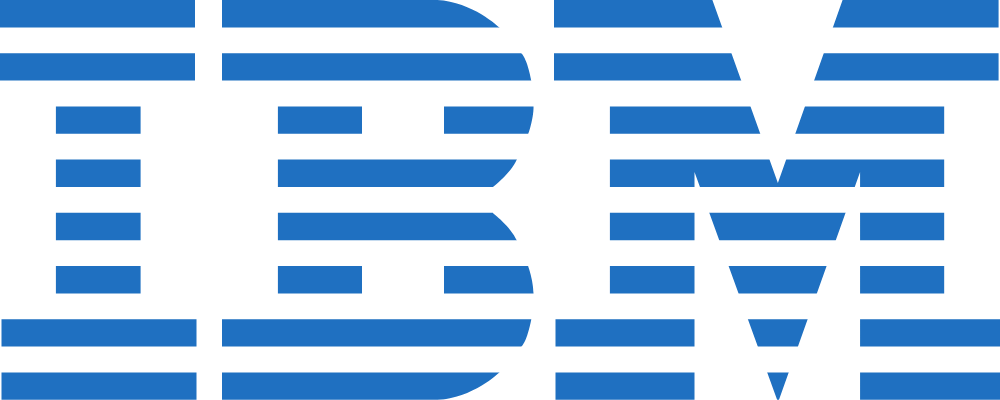
</div>

### IBM Data Set from Reddit API

In [3]:
ucomm_data

,title,subreddit,score,author,Number of submissions,body
0,IBM job ad calls for 12 years’ experience with...,ibm,49,koavf,9,
1,IBMers with 20+ years of experience: your thou...,ibm,41,crownmaker,20,I'd be curious to hear your take on what you'r...
2,What is with all the hate for IBM?,ibm,32,jjr96,82,I see a lot of hate for IBM on here. I was jus...
3,So I'm quitting...,ibm,28,kattarax3,21,"Hey guys, I'm turning in my notice shortly and..."
4,Should I quit IBM for a job elsewhere that pay...,ibm,25,StayOrGeux,14,I have been at IBM for almost ten years now. ...
5,Why do so many people hate it at IBM?,ibm,23,Nickslife89,27,
6,Is IBM a bad place to work?,ibm,18,haveaquestion999,15,"Hello everyone, I'm soon to be graduate and my..."
7,Potentially quitting IBM Watson Health,ibm,17,nomadgd,6,I have 10+ consulting experience around enterp...
8,easy yourlearning badges,ibm,16,jacklucas19,12,I was just wondering if anyone knows some good...
9,Does anyone have experience transferring to an...,ibm,13,biiigthrowawayacct,20,"I’m a 2020 grad, that will be starting as a co..."


# Use Sentiment Analysis / Opinion Mining

## Valence Aware Dictionary and sEntiment Reasoner (VADER)

### Why is sentiment analysis useful?
- Mining opinions from unstructured data (blogs, social media, news etc. )
- Useful for businesses for processing large number of reviews, interactive experiences with chatbots
- Useful in understanding public opinion on policy matters and polarization
- Ex. what are people saying before they leave a company? 

In [4]:
# Making an empty dictionary
from collections import defaultdict
sents_dict = defaultdict(list)

sub = 'ibm'

reviews = pd.read_csv('SD21Data/' + sub + '.csv', header=0)
analyzer = SentimentIntensityAnalyzer()
reviews.body = reviews.body.fillna('nothing')

# Adding data to the dictionary
for sentence in reviews.body:
    vs = analyzer.polarity_scores(sentence)
    sents_dict['pos'].append(round(vs['pos']*100,2))
    sents_dict['neg'].append(round(vs['neg']*100,2))
    sents_dict['neu'].append(round(vs['neu']*100,2))
    sents_dict['compound'].append(round(vs['compound']))

# Create a dataframe from a dictionary
scores = pandas.DataFrame(sents_dict)

# Concatnating data with sentiment scores 
finalframe = pandas.concat([reviews, scores], axis=1)
finalframe.subreddit = finalframe.subreddit.astype('str')
#finalframe.drop('Unnamed: 0')

# Sorting finalframe by the top positive and negative sentiment scores
positive = finalframe.sort_values(by = 'pos', ascending = False).iloc[0:top_limit, :].reset_index(drop=True)
negative = finalframe.sort_values(by = 'neg', ascending = False).iloc[0:top_limit, :].reset_index(drop=True)

## Final data set with Sentiment Scores

### VADER Scores: 


The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories.

The Compound score is a single unidimensional measure of sentiment for a given sentence. Calling it a 'normalized, weighted composite score' is accurate.

In [5]:
finalframe.drop('Unnamed: 0',axis=1)

,title,subreddit,score,author,Number of submissions,body,pos,neg,neu,compound
0,IBM job ad calls for 12 years’ experience with...,ibm,49,koavf,9,nothing,0.0,0.0,100.0,0
1,IBMers with 20+ years of experience: your thou...,ibm,41,crownmaker,20,I'd be curious to hear your take on what you'r...,20.3,5.5,74.2,1
2,What is with all the hate for IBM?,ibm,32,jjr96,82,I see a lot of hate for IBM on here. I was jus...,0.0,13.0,87.0,-1
3,So I'm quitting...,ibm,28,kattarax3,21,"Hey guys, I'm turning in my notice shortly and...",16.8,0.0,83.2,1
4,Should I quit IBM for a job elsewhere that pay...,ibm,25,StayOrGeux,14,I have been at IBM for almost ten years now. ...,11.1,5.6,83.2,1
5,Why do so many people hate it at IBM?,ibm,23,Nickslife89,27,,0.0,0.0,0.0,0
6,Is IBM a bad place to work?,ibm,18,haveaquestion999,15,"Hello everyone, I'm soon to be graduate and my...",13.0,5.5,81.6,1
7,Potentially quitting IBM Watson Health,ibm,17,nomadgd,6,I have 10+ consulting experience around enterp...,5.5,10.6,83.9,-1
8,easy yourlearning badges,ibm,16,jacklucas19,12,I was just wondering if anyone knows some good...,5.2,0.0,94.8,0
9,Does anyone have experience transferring to an...,ibm,13,biiigthrowawayacct,20,"I’m a 2020 grad, that will be starting as a co...",18.9,0.0,81.1,1


# Use spaCy to do Name Entity Recognition (NER)

<div>
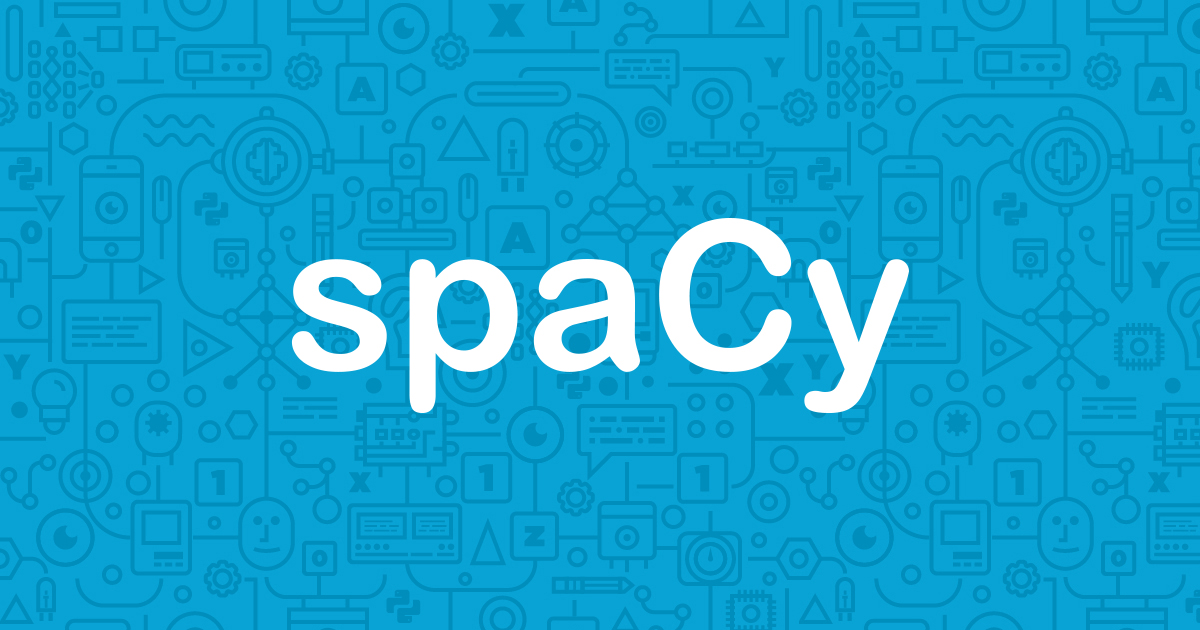
</div>

<div>
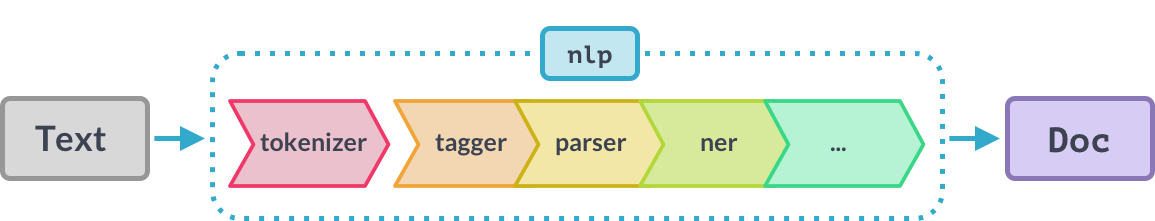
</div>


In [6]:
import spacy
from spacy import displacy
#Printing top positive comments
display(HTML("<h2>Here are r/" + sub + " Top " + str(top_limit) +  " Positive Comments</h2>"))

nlp = spacy.load("en_core_web_sm")
for i in positive.index:
    print("----------------------------------------------------------------------------")
    doc = nlp(positive.loc[i,'body'])
    print('{', 'Positive:', positive.loc[i, 'pos'], ', Negative:', 
          positive.loc[i,'neg'],', Neutral:', positive.loc[i,'neu'], '}')
    displacy.render(doc, style="ent",jupyter=True)  

----------------------------------------------------------------------------
{ Positive: 35.3 , Negative: 0.0 , Neutral: 64.7 }


----------------------------------------------------------------------------
{ Positive: 21.4 , Negative: 0.0 , Neutral: 78.6 }


----------------------------------------------------------------------------
{ Positive: 20.3 , Negative: 5.5 , Neutral: 74.2 }


----------------------------------------------------------------------------
{ Positive: 18.9 , Negative: 0.0 , Neutral: 81.1 }


----------------------------------------------------------------------------
{ Positive: 16.8 , Negative: 0.0 , Neutral: 83.2 }


In [7]:
# Printing top negative comments 
display(HTML("<h2>Here are r/" + sub + " Top " + str(top_limit) +  " Negative Comments</h2>"))
for i in negative.index:
    print("----------------------------------------------------------------------------")
    doc = nlp(negative.loc[i,'body'])
    print('{', 'Positive:', negative.loc[i, 'pos'], ', Negative:', 
          negative.loc[i,'neg'],', Neutral:', negative.loc[i,'neu'],'}')
    displacy.render(doc, style="ent",jupyter=True) 

----------------------------------------------------------------------------
{ Positive: 0.0 , Negative: 23.2 , Neutral: 76.8 }


----------------------------------------------------------------------------
{ Positive: 7.0 , Negative: 15.2 , Neutral: 77.8 }


----------------------------------------------------------------------------
{ Positive: 9.9 , Negative: 15.0 , Neutral: 75.1 }


----------------------------------------------------------------------------
{ Positive: 0.0 , Negative: 13.0 , Neutral: 87.0 }


----------------------------------------------------------------------------
{ Positive: 9.9 , Negative: 11.9 , Neutral: 78.1 }


In [8]:
# Finding averages 
pos_ave = round(np.average(finalframe.pos),2)
neg_ave = round(np.average(finalframe.neg),2)
neu_ave = round(np.average(finalframe.neu),2)

# Printing average scores 
display(HTML("<h2> " + 'r/'+ sub + "'s comments average a " + str(pos_ave) + ' positive score, a ' + str(neg_ave) + ' negative score, and a ' + str(neu_ave) + " neutral score</h2>"))

# Code to Tokenize (Clean) and Analyze Word Frequency in IBM Data Set

In [9]:
from collections import Counter
from collections import defaultdict
def top20(thislist, isStr):
    # First make a string out of the entire list
    if isStr:
        BIGstr = " ".join(thislist)
        wordlist = BIGstr.split(" ")
    else:
        wordlist = thislist
    wordcount = Counter(wordlist)
    print(wordcount.most_common(50))
#This function removes weird characters
import re
def textcleaner(row):
    row = row.lower()
    #remove urls
    row  = re.sub(r'http\S+', '', row)
    #remove mentions
    row = re.sub(r"(?<![@\w])@(\w{1,25})", '', row)
    #remove hashtags
    row = re.sub(r"(?<![#\w])#(\w{1,25})", '',row)
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row)
    #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    return row

cleaned_textlist = []

for t in finalframe.body:
    cleaned_textlist.append(textcleaner(t))
stoplist = []
with open("SD21Data/stopliist.txt", "r") as rfile:
    for line in rfile:
        stoplist.append(line.strip("\n"))
def stopword_removal(row):
    words  = row.split(" ")
    new_row = [w for w in words if w not in stoplist]
    return " ".join(new_row)

nostop_list = []
for c in cleaned_textlist:
    nostop_list.append(stopword_removal(c))
    
largestfreq = top20(nostop_list, True)

[('', 52), ('work', 17), ('im', 13), ('still', 11), ('experience', 9), ('also', 9), ('offer', 8), ('money', 8), ('internship', 8), ('years', 7), ('wondering', 7), ('working', 7), ('company', 7), ('looking', 6), ('think', 6), ('something', 6), ('one', 6), ('even', 6), ('feel', 5), ('development', 5), ('many', 5), ('pay', 5), ('big', 5), ('ive', 5), ('left', 5), ('month', 5), ('manager', 5), ('questions', 5), ('research', 5), ('interns', 5), ('take', 4), ('hate', 4), ('really', 4), ('much', 4), ('salary', 4), ('make', 4), ('well', 4), ('people', 4), ('though', 4), ('k', 4), ('could', 4), ('project', 4), ('id', 3), ('culture', 3), ('changed', 3), ('-', 3), ('bad', 3), ('two', 3), ('career', 3), ('else', 3)]


# Finding the most common topics in the IBM Data Set using WordCloud

In [10]:

display(HTML('<h1>Analyzing ' + str(submission_limit) + ' of ' + sub + " most recent threads...</h1>"))

import numpy as np
from PIL import Image
# Import package
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = WordCloud(width = 1000, height = 500, random_state=1, background_color='white', colormap='Set2', collocations=False, stopwords = stoplist).generate(finalframe.body.to_string())

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off")
    plt.show();

plot_cloud(text)

<Figure size 4000x3000 with 1 Axes>

# Quantitative Analysis of Review Sentiment Score using Box Plots

In [15]:
# Plotting the distrbution of positive and negative sentiment 
import plotly.express as px
fig = px.box(finalframe, x="subreddit", y="pos", color="subreddit",
             title="Distribution of Comment Positivity for: r/" + sub,
             hover_data=["pos"]
            )
fig.update_layout(
    xaxis_title="Subreddit",
    yaxis_title="Positivity %",
    legend_title="Key",
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"
    ))
fig.show()
fig2 = px.box(finalframe, x="subreddit", y="neg", color="subreddit",
             title="Distribution of Comment Negativity  for: r/" + sub,
             hover_data=["neg"] 
            )
fig2.update_layout(
    xaxis_title="Subreddit",
    yaxis_title="Negativity %",
    legend_title="Key",
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"
    ))
fig2.show()
fig3 = px.box(finalframe, x="subreddit", y="neu", color="subreddit",
             title="Distribution of Comment Neutrality  for: r/" + sub,
             hover_data=["neu"] 
            )
fig3.update_layout(
    xaxis_title="Subreddit",
    yaxis_title="Neutrality %",
    legend_title="Key",
    font=dict(
        family="Times New Roman",
        size=18,
        color="black"
    ))
fig3.show()



# Distribution of Sentiment Score using Histograms

In [12]:
import plotly.express as px
fig = px.histogram(finalframe, x="pos",color="subreddit",
             title="Distribution of Comment Positivity for: r/" + sub,
             hover_data=["pos"], nbins=10
            )
fig.show()
fig2 = px.histogram(finalframe, x="neg", color="subreddit",
             title="Distribution of Comment Negativity  for: r/" + sub,
             hover_data=["neg"], nbins=10
            )
fig2.show()
fig3 = px.histogram(finalframe, x="neu", color="subreddit",
             title="Distribution of Comment Neutrality  for: r/" + sub,
             hover_data=["neu"], nbins=10
            )
fig3.show()